This notebook reprpduces plots in Figure7.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tifffile as tiff
import glob
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multitest as smm

In [2]:
# load larval area mask data and calculate body area changes over time
# You can open each mask file with napari

#Loading experimental group body area data
data_exp=[]
files_exp = glob.glob("../data/Fig6/mask_proofread_ATR+/*.tif")
for file in files_exp:
    binary=tiff.imread(file)
    body_area_size=binary.sum(axis=(1,2))
    data_exp.append(body_area_size)

#Loading effector control body area data
data_effector=[]
files_effector = glob.glob("../data/Fig6/mask_w_GtACR1_240929_proofread/*.tif")
for file in files_effector:
    binary=tiff.imread(file)
    body_area_size=binary.sum(axis=(1,2))
    data_effector.append(body_area_size)

#Loading ATR- control body area data
data_ATR_minus=[]
files_ATR_minus = glob.glob("../data/Fig6/mask_proofread_ATR-/*.tif")
for file in files_ATR_minus:
    binary=tiff.imread(file)
    body_area_size=binary.sum(axis=(1,2))
    data_ATR_minus.append(body_area_size)

In [3]:
#prepareing normalized area data
normalized_area=[]
for series in data_exp:
    normalized_area.append(series/series[:60].mean())
    #normalized with mean body area before stimulation
normalized_area=np.array(normalized_area)

normalized_area_effector_ctrl=[]
for series in data_effector:
    normalized_area_effector_ctrl.append(series/series[:60].mean())
normalized_area_effector_ctrl=np.array(normalized_area_effector_ctrl)

normalized_area_ATR_minus_ctrl=[]
for series in data_ATR_minus:
    normalized_area_ATR_minus_ctrl.append(series/series[:60].mean())
normalized_area_ATR_minus_ctrl=np.array(normalized_area_ATR_minus_ctrl)

#compute mean quantile
exp_mean=np.mean(normalized_area, axis=0)
exp_75 = np.mean(normalized_area, axis=0)+np.std(normalized_area, axis=0)
exp_25 = np.mean(normalized_area, axis=0)-np.std(normalized_area, axis=0)

ctrl_effector_mean=np.mean(normalized_area_effector_ctrl, axis=0)
ctrl_effector_75 = np.mean(normalized_area_effector_ctrl, axis=0)+np.std(normalized_area_effector_ctrl, axis=0)
ctrl_effector_25 = np.mean(normalized_area_effector_ctrl, axis=0)-np.std(normalized_area_effector_ctrl, axis=0)

ctrl_ATR_minus_mean=np.mean(normalized_area_ATR_minus_ctrl, axis=0)
ctrl_ATR_minus_75 = np.mean(normalized_area_ATR_minus_ctrl, axis=0)+np.std(normalized_area_ATR_minus_ctrl, axis=0)
ctrl_ATR_minus_25 = np.mean(normalized_area_ATR_minus_ctrl, axis=0)-np.std(normalized_area_ATR_minus_ctrl, axis=0)

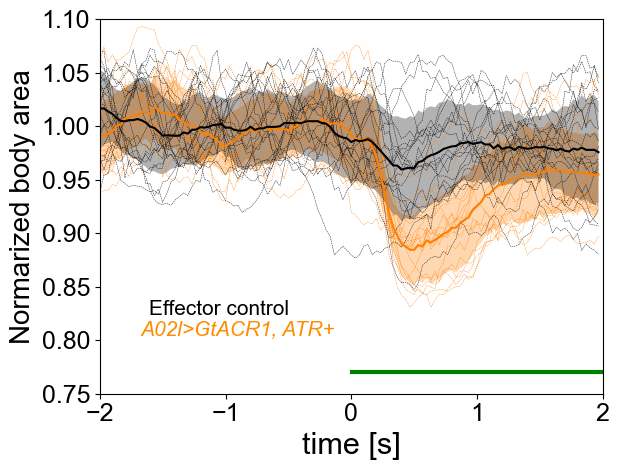

In [4]:
#Fig 6D
plt.rcParams['font.family']='Arial'
fig = plt.figure()
ax = fig.add_subplot()
time=np.arange(len(series))*1/30-2.0
for series in normalized_area:
    plt.plot(time, series, c='#ff7f00', lw=0.3, linestyle = "--")

for series in normalized_area_effector_ctrl:
    plt.plot(time, series, c='k', lw=0.3, linestyle = "--")
    
    
plt.plot(time, exp_mean, c='#ff7f00')
ax.fill_between(time, exp_25, exp_75, facecolor='#ff7f00', alpha=0.3)

plt.plot(time, ctrl_effector_mean, c='k')
ax.fill_between(time, ctrl_effector_25, ctrl_effector_75, facecolor='k', alpha=0.3)
y_pos=0.77
ax.plot([0.01, 0.01, 2, 2], [y_pos,y_pos,y_pos,y_pos], lw=3, c='g')

plt.text(-1.05, 0.82, "Effector control", ha='center', va='bottom', 
         c='k', fontsize=15)
plt.text(-0.9, 0.8 ,"A02l>GtACR1, ATR+", ha='center', va='bottom', 
         c='darkorange', fontsize=15, style='italic')

plt.xlim(-2,2)
plt.ylim(0.75,1.1)
plt.xlabel('time [s]', fontsize=22)
plt.ylabel('Normarized body area', fontsize=20, )

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
ax.set_xticks([-2,-1, 0,1,2])
plt.savefig('figures/Fig6D.svg')

In [5]:
#compute average area size in t=0~1 sec
after_mean=[]
for series in data_exp:
    after_mean.append(series[60:90].mean()/series[:60].mean())
after_mean=np.array(after_mean)

after_mean_effector_ctrl=[]
for series in data_effector:
    after_mean_effector_ctrl.append(series[60:90].mean()/series[:60].mean())
after_mean_effector_ctrl=np.array(after_mean_effector_ctrl)

after_mean_ATR_minus_ctrl=[]
for series in data_ATR_minus:
    after_mean_ATR_minus_ctrl.append(series[60:90].mean()/series[:60].mean())
after_mean_ATR_minus_ctrl=np.array(after_mean_ATR_minus_ctrl)

In [6]:
#statistcal test
s1,p1=stats.mannwhitneyu(after_mean, after_mean_effector_ctrl)
s2,p2=stats.mannwhitneyu(after_mean, after_mean_ATR_minus_ctrl)
corrected_pvalues = smm.multipletests([p1, p2], alpha=0.05, method='holm')[1]

In [7]:
print('pvalues after Holm correction:[exp vs effector ctrl, exp vs ATR- ctrl]')
print(corrected_pvalues)

pvalues after Holm correction:[exp vs effector ctrl, exp vs ATR- ctrl]
[4.73047576e-05 6.80753730e-06]


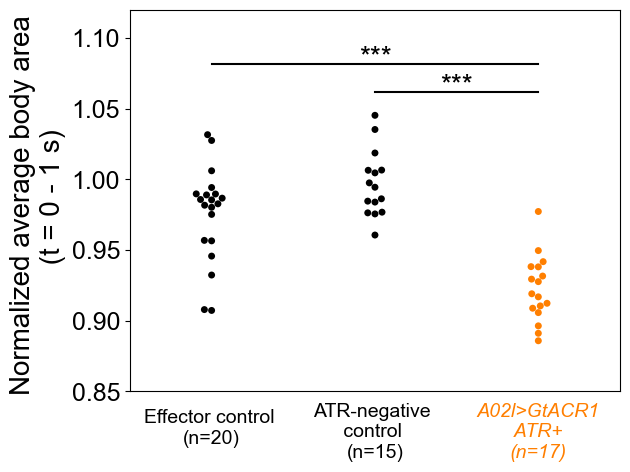

In [12]:
#Fig 6D
fig = plt.figure()
ax = fig.add_subplot(111)
sns.swarmplot(data=[after_mean_effector_ctrl, after_mean_ATR_minus_ctrl, after_mean], palette=['k','k', '#ff7f00'])
plt.xlim(-0.5,2.5)

ax.tick_params(labelbottom=False, labeltop=False, bottom=False)
plt.ylabel('Normalized average body area \n (t = 0 - 1 s)', fontsize=20)
x1, x2 = 0, 2
y, h, col = after_mean_effector_ctrl.max() + 0.05, 0, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h-0.005, "***", ha='center', va='bottom', color=col,  fontsize=20)

x1, x2 = 1, 2 
y, h, col = after_mean_effector_ctrl.max() + 0.03, 0, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h-0.005, "***", ha='center', va='bottom', color=col,  fontsize=20)

plt.ylim(0.85, 1.12)
plt.yticks(fontsize=18)
ax.text(0, 0.81, "Effector control \n(n=20)", ha='center', va='bottom', color=col,  fontsize=14)
ax.text(1, 0.80, "ATR-negative \n control  \n(n=15)", ha='center', va='bottom', color=col,  fontsize=14)
ax.text(2, 0.80, "A02l>GtACR1\n ATR+ \n(n=17)", ha='center', va='bottom', color='#ff7f00',  style='italic', fontsize=14)
plt.tight_layout()
plt.savefig('figures/Fig6E.svg')